In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/data.csv", sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# identify column types
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print('Length of numeric columns:', len(numeric_cols))

print("Categorical columns:", categorical_cols)
print('Length of categorical columns:', len(categorical_cols))

Numeric columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Leng

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
df.duplicated().sum()

0

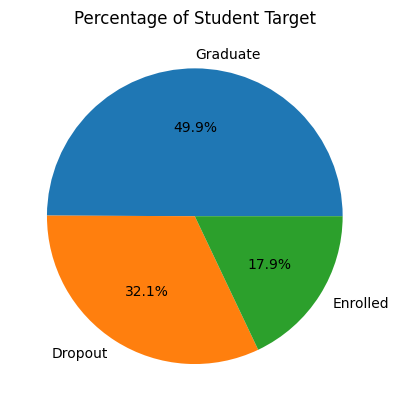

In [7]:
target = df['Target'].value_counts()
plt.pie(target, labels=target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

In [8]:
# drop and assign back
df = df.drop('Nacionality', axis=1)

In [9]:
# mapping for previous qualification codes -> labels
pq_map = {
    1: 'Basic Education',
    2: 'Higher Education',
    3: 'Higher Education',
    4: 'Higher Education - Master or Doctorate',
    5: 'Higher Education - Master or Doctorate',
    6: 'Higher Education',
    9: 'Incomplete Basic Education',
    10: 'Incomplete Basic Education',
    12: 'Incomplete Basic Education',
    14: 'Incomplete Basic Education',
    15: 'Incomplete Basic Education',
    19: 'Incomplete Basic Education',
    38: 'Incomplete Basic Education',
    39: 'Technological Specialization Course',
    40: 'Higher Education',
    42: 'Higher Technical Course',
    43: 'Higher Education - Master or Doctorate',
}

# Safely map values (handles NaN and float codes)
def _map_prev_qual(x):
    if pd.isnull(x):
        return np.nan
    try:
        key = int(x)
    except Exception:
        return x
    return pq_map.get(key, np.nan)

df['Previous qualification'] = df['Previous qualification'].apply(_map_prev_qual)

# show counts including NaNs
df["Previous qualification"].value_counts(dropna=False)

Previous qualification
Basic Education                           3717
Incomplete Basic Education                 232
Technological Specialization Course        219
Higher Education                           205
Higher Technical Course                     36
Higher Education - Master or Doctorate      15
Name: count, dtype: int64

In [10]:
# mapping for previous qualification codes -> labels
pq_map = {
    1: 'Basic Education',
    2: 'Higher Education',
    3: 'Higher Education',
    4: 'Higher Education - Master or Doctorate',
    5: 'Higher Education - Master or Doctorate',
    6: 'Higher Education',
    9: 'Incomplete Basic Education',
    10: 'Incomplete Basic Education',
    11: 'Incomplete Basic Education',
    12: 'Incomplete Basic Education',
    14: 'Incomplete Basic Education',
    18: 'General Course',
    19: 'Incomplete Basic Education',
    22: 'Technical Course',
    26: 'Incomplete Basic Education',
    27: 'Basic Education',
    29: 'Incomplete Basic Education',
    30: 'Incomplete Basic Education',
    34: 'Unknown',
    35: 'Iliterate',
    36: 'Incomplete Basic Education',
    37: 'Incomplete Basic Education',
    38: 'Incomplete Basic Education',
    39: 'Technological Specialization Course',
    40: 'Higher Education',
    41: 'Higher Education',
    42: 'Higher Technical Course',
    43: 'Higher Education - Master or Doctorate',
    44: 'Higher Education - Master or Doctorate',
}

# Safely map values (handles NaN and float codes)
def _map_prev_qual(x):
    if pd.isnull(x):
        return np.nan
    try:
        key = int(x)
    except Exception:
        return x
    return pq_map.get(key, np.nan)

df['Mother\'s qualification'] = df['Mother\'s qualification'].apply(_map_prev_qual)

# show counts including NaNs
df["Mother's qualification"].value_counts(dropna=False)

Mother's qualification
Incomplete Basic Education                2592
Basic Education                           1070
Higher Education                           540
Unknown                                    130
Higher Education - Master or Doctorate      75
Technological Specialization Course          8
Higher Technical Course                      4
Iliterate                                    3
General Course                               1
Technical Course                             1
Name: count, dtype: int64

In [11]:
# mapping for previous qualification codes -> labels
pq_map = {
    1: 'Basic Education',
    2: 'Higher Education',
    3: 'Higher Education',
    4: 'Higher Education - Master or Doctorate',
    5: 'Higher Education - Master or Doctorate',
    6: 'Higher Education',
    9: 'Incomplete Basic Education',
    10: 'Incomplete Basic Education',
    11: 'Incomplete Basic Education',
    12: 'Incomplete Basic Education',
    13: 'Basic Education',
    14: 'Incomplete Basic Education',
    18: 'General Course',
    19: 'Incomplete Basic Education',
    20: 'Basic Education',
    22: 'Technical Course',
    25: 'Basic Education',
    26: 'Incomplete Basic Education',
    27: 'Basic Education',
    29: 'Incomplete Basic Education',
    30: 'Incomplete Basic Education',
    31: 'General Course',
    33: 'General Course',
    34: 'Unknown',
    35: 'Iliterate',
    36: 'Incomplete Basic Education',
    37: 'Incomplete Basic Education',
    38: 'Incomplete Basic Education',
    39: 'Technological Specialization Course',
    40: 'Higher Education',
    41: 'Higher Education',
    42: 'Higher Technical Course',
    43: 'Higher Education - Master or Doctorate',
    44: 'Higher Education - Master or Doctorate',
}

# Safely map values (handles NaN and float codes)
def _map_prev_qual(x):
    if pd.isnull(x):
        return np.nan
    try:
        key = int(x)
    except Exception:
        return x
    return pq_map.get(key, np.nan)

df['Father\'s qualification'] = df['Father\'s qualification'].apply(_map_prev_qual)

# show counts including NaNs
df["Father's qualification"].value_counts(dropna=False)

Father's qualification
Incomplete Basic Education                2955
Basic Education                            908
Higher Education                           359
Unknown                                    112
Higher Education - Master or Doctorate      60
Technological Specialization Course         20
Technical Course                             4
General Course                               3
Iliterate                                    2
Higher Technical Course                      1
Name: count, dtype: int64